# Import the Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.preprocessing import image

# Importing the Dataset

In [2]:
p = Path("C:/Users/jaiga/Desktop/Image_Classification")
dirs = p.glob("*")

label_dict = {"cat":0, "dog":1,"horse":2}

img_data = []
labels = []

for folder_dir in dirs:
    #print(folder_dir)
    label = str(folder_dir).split("\\")[-1][:-1]
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(32,32))
        img_array = image.img_to_array(img)
        img_data.append(img_array)
        labels.append(label_dict[label])
    

In [3]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [4]:
image_data = np.array(img_data, dtype= 'float32')/255.0
labels = np.array(labels)

In [5]:
import random
combined = list(zip(image_data, labels))
random.shuffle(combined)
image_data[:], labels[:] = zip(*combined)

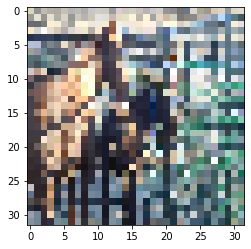

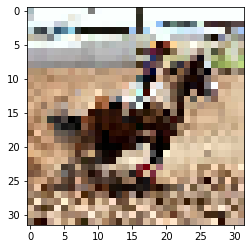

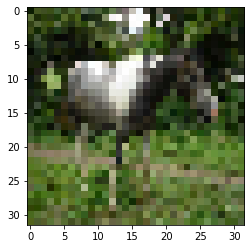

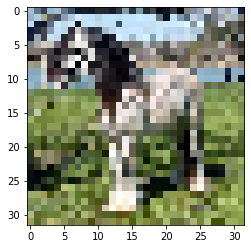

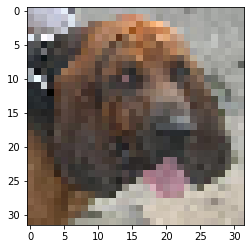

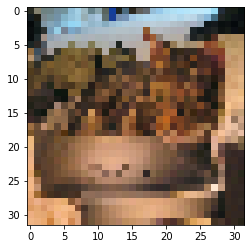

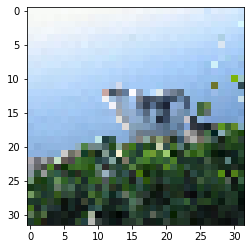

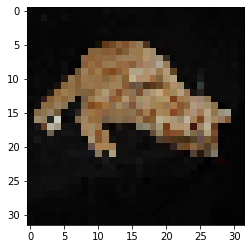

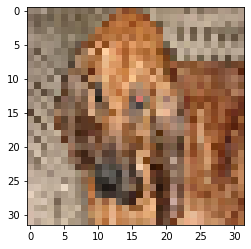

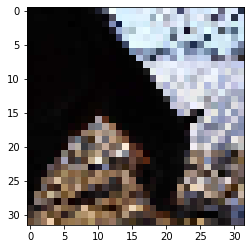

In [6]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    
for i in range(10):
    drawImg(image_data[i])

# Custom SVM Classifier

In [7]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def HingeLoss(self, X,W,Y,b):
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.C * max(0, 1-ti)
        return loss[0][0]
    
    def fit(self, X,Y, batch_size = 100, learning_rate = 0.001, maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        W = np.zeros((1, no_of_features))
        c = self.C
        bias = 0
        losses = []
        for i in range(maxItr):
            l = self.HingeLoss(X,W,Y,bias)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in (0, no_of_samples, batch_size):
                gradw = 0.0
                gradb = 0.0
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W, X[i].T)+bias)
                        if ti>1:
                            gradw += 0.0
                            gradb += 0.0
                        else:
                            gradw += c*X[i]*Y[i]
                            gradb += c*Y[i]
                            
                W = W - n*W + n*gradw
                bias = bias + n*gradb
            
        self.W = W
        self.b = bias
        return W, bias, losses
        

In [8]:
M = image_data.shape[0]
image_data = image_data.reshape((M,-1))
print(image_data.shape)

(785, 3072)


In [9]:
CLASSES = len(np.unique((labels)))
print(CLASSES)

3


In [10]:
def classWiseData(x, y):
    data = {}
    for i in range(CLASSES):
        data[i] = []
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for i in range(CLASSES):
        data[i] = np.array(data[i])
    return data

In [11]:
data = classWiseData(image_data, labels)

In [12]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])

262
187
336


In [13]:
def getDataPairForSVM(d1, d2):
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples, features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1] = d1
    data_pair[l1:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair, data_labels

[449.0, 432.54200596458986, 412.4371947754474, 403.6621351496239, 397.81474365134653, 397.1647310760057, 396.98668155429664, 396.75628417666366, 395.3428109626454, 394.8398018904934, 395.6132980766625, 393.58691693524173, 393.33900294785, 394.7290705350754, 396.8437112618914, 392.5171745500174, 391.1073004944525, 390.52467504205714, 390.0304750965111, 389.9384358487546, 389.0645572851389, 388.6706497856736, 388.2345246960638, 388.23471824203926, 387.2022441736853, 386.7784333436678, 388.06811543424686, 386.280831760359, 386.16128642708037, 386.2089915570616, 385.5586905960693, 385.08862737003375, 384.5953832277749, 389.14595371839204, 386.1448713541329, 383.5261999394564, 383.1742372280859, 384.0819422800347, 383.66356050893984, 382.7668990844006, 384.4127959655795, 382.2668718486702, 382.1306696206406, 381.3941344259213, 381.8362693858448, 380.94806952261655, 380.8669318279279, 380.7676157759969, 381.39436094609573, 380.9604524985744, 379.8494654997574, 379.69118066386704, 379.9188088

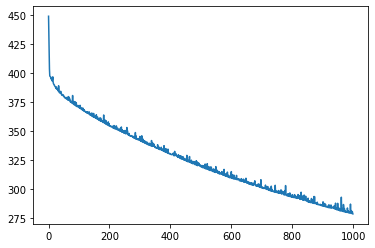

In [14]:
my_svm = SVM()
xp , yp = getDataPairForSVM(data[0], data[1])
wts, b, loss = my_svm.fit(xp, yp, learning_rate=0.00001, maxItr=1000)
print(loss)
plt.plot(loss)

In [15]:
def trainSVMSs(x, y):
    svm_classifiers = {}
    
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1, CLASSES):
            xpair, ypair = getDataPairForSVM(data[i], data[j])
            wts, b, loss = my_svm.fit(xpair, ypair, learning_rate=0.00001, maxItr=1000)
            svm_classifiers[i][j] = (wts, b)
            plt.plot(loss)
            plt.show()
    return svm_classifiers
            

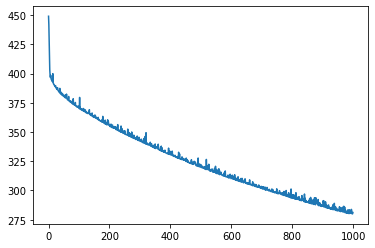

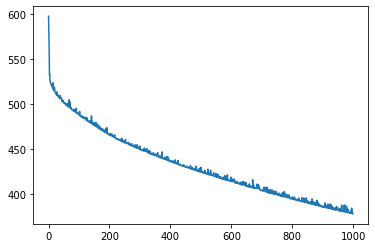

In [ ]:
svm_classifiers = trainSVMSs(image_data, labels)

In [57]:
#Parameters for cats and dogs
svm_classifiers[0][1]

(array([[-0.00050592,  0.00316207, -0.0029738 , ...,  0.00016893,
          0.00457227,  0.00908958]]),
 -0.04168999999999992)

In [58]:
def binaryPredict(x,w,b):
    z = np.dot(x, w.T) + b
    if z>=0:
        z = 1
    else:
        z = -1
    return z

def predict(x):
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1, CLASSES):
            wts, b = svm_classifiers[i][j]
            z = binaryPredict(x,wts,b)
            
            if z==1:
                count[j] += 1
            else:
                count[i] += 1
    final_prediction = np.argmax(count)
    return final_prediction

In [59]:
print(predict(image_data[1]))
print(labels[1])

1
1


In [60]:
def accuracy(x, y):
    acc = 0
    for i in range(x.shape[0]):
        pred = predict(x[i])
        if pred == y[i]:
            acc += 1
    return (acc/x.shape[0]) * 100

In [61]:
accuracy(image_data, labels)

59.36305732484076

# Verifying the Model with Sklearn

In [62]:
from sklearn import svm

In [63]:
svm_classifier = svm.SVC(kernel='linear', C = 1.0)

In [64]:
svm_classifier.fit(image_data, labels)

SVC(kernel='linear')

In [65]:
svm_classifier.score(image_data, labels)

0.6802547770700637